In [18]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
from sklearn.svm import LinearSVC, SVC

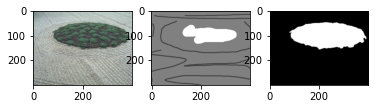

In [19]:
filename = '86016.bmp'
img = cv2.imread('../datasets/imagenes_segmentacion/images/'+filename)
mask = cv2.imread('../datasets/imagenes_segmentacion/bordes_mr/'+filename)
real = cv2.imread('../datasets/imagenes_segmentacion/bordes_real/'+filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(mark)
plt.subplot(1,3,3)
plt.imshow(real)
plt.show()

In [20]:
print('img', img.shape)
print('mark',mark.shape)
print('real',real.shape)

nrows,ncols,nch = img.shape
# Image vectorization
Ximg = np.reshape(img,(nrows*ncols,nch))
Xmask = np.reshape(mark,(nrows*ncols,nch))[:,0]
Xreal = np.reshape(real,(nrows*ncols,nch))[:,0]

print('Ximg',Ximg.shape)
print('Xmask',Xmask.shape)
print('Xreal',Xreal.shape)


img (300, 400, 3)
mark (300, 400, 3)
real (300, 400, 3)
Ximg (120000, 3)
Xmask (120000,)
Xreal (120000,)


In [21]:
values = np.unique(Xmask)
print(values) #64 -> fondo, 255->objeto

[ 64 128 255]


In [22]:
Xobj = Ximg[ Xmask==255, : ]
Xbck = Ximg[ Xmask==64, :]
Xtrain = np.concatenate((Xobj,Xbck),axis=0)

Yobj = np.ones((len(Xobj)))*255
Ybck = np.zeros((len(Xbck)))
Ytrain = np.concatenate((Yobj,Ybck),axis=0)

print('Xobj',Xobj.shape)
print('Xbck',Xbck.shape)
print('Xtrain',Xtrain.shape,'Ytrain',Ytrain.shape)


Xobj (10791, 3)
Xbck (10617, 3)
Xtrain (21408, 3) Ytrain (21408,)


In [23]:
model = LinearSVC()
model.fit(Xtrain,Ytrain)
Xpred = model.predict(Ximg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


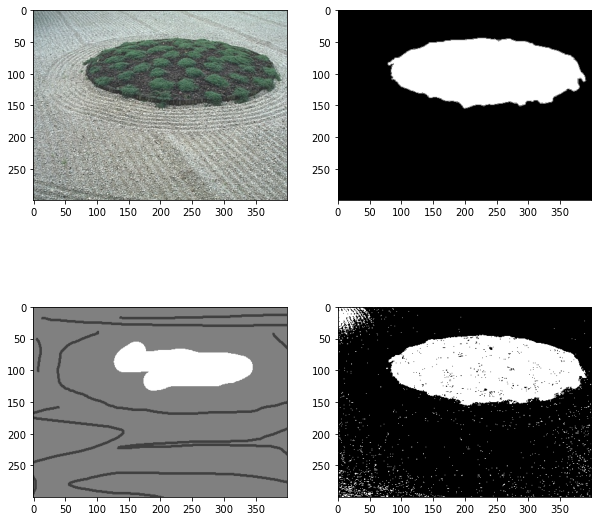

In [24]:
pred = np.reshape(Xpred,(nrows,ncols))

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(real,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(mark,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(pred,cmap='gray')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


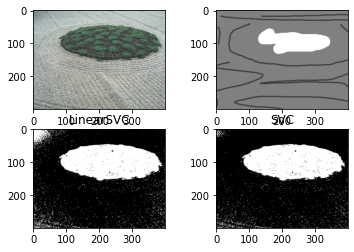

--> Linear SVC Accuracy
96.71 %
--> SVC Accuracy
94.91 %


'\nMreal <- Imagen vectorizada de la máscara real\nMpred <- Imagen vectorizada de la máscara de SVC\n\nn = len(Mreal)\naccuracy = np.sum(Mreal==Mpred)/n\n'

In [59]:
modelL = LinearSVC()
modelL.fit(Xtrain,Ytrain)
XpredL = modelL.predict(Ximg)
predL = np.reshape(XpredL,(nrows,ncols))

model = SVC()
model.fit(Xtrain,Ytrain)
Xpred = model.predict(Ximg)
pred = np.reshape(Xpred,(nrows,ncols))

plt.figure()
plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(mark,cmap='gray')
plt.subplot(2,2,3)
plt.title('\nLinearSVC')
plt.imshow(predL,cmap='gray')
plt.subplot(2,2,4)
plt.title('SVC')
plt.imshow(pred,cmap='gray')
plt.show()


'''
    120,000 pixeles en total
    -> Xpred = SVC vectorizada
    -> XpredL = LinearSVC vectorizada
'''
nReal = len(Xreal)
 # Linear Accuracy 
print("--> Linear SVC Accuracy")
linearTrue = np.count_nonzero(predL)
linearSVC_accuracy = np.sum(Xreal == Xpred)/nReal #porcentaje de accuracy para SVC
print(np.round(linearSVC_accuracy*100,2),'%')

#SVC Accuracy
print("--> SVC Accuracy")
svcTrue = np.count_nonzero(pred)
SVC_accuracy = np.sum(Xreal == XpredL)/nReal #porcentaje de accuracy para SVC
print(np.round(SVC_accuracy*100,2),'%')